In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Polynomial Regression

Let's start by looking into Regression problem using Scikit Learn (sklearn). Sklearn has LinearRegression() api for doing linear regression. If we want to do polynomial regression, we create the polynomial features using PolynomialFeatures() and then do a linear regression. To make this easier, sklearn provides make_pipeline(). 

In [0]:
# Import polynomial features & linear regression modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# import pipleline to combine polyomical features & linar regression
from sklearn.pipeline import make_pipeline

Now, define a polynomial regression function by combining PolynomialFeatures and LinearRegression through a pipeline.

In [0]:
# Polynomial regression function
def PolynomialRegression(degree=1,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

# Data

Create some synthetic data for regression fit.

In [0]:
# Make data function
import numpy as np
def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    # Randomly sample x axis
    X = rng.rand(N,1) ** 2
    # Function -> create y values
    y = 10 - 1.0/(X.ravel()+0.1)
    # Optionally add noise in y values
    if err > 0:
        y += err * rng.randn(N)
    return X, y

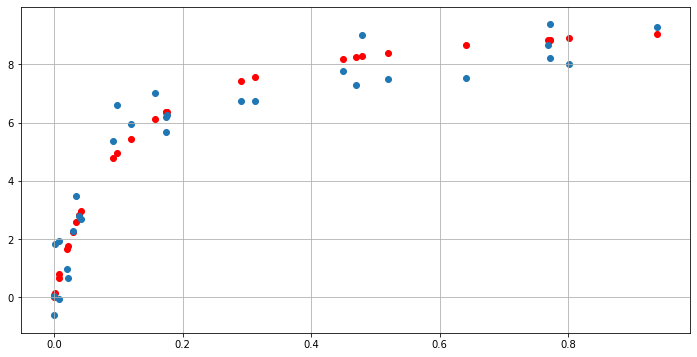

In [54]:
# Generate some data
sample_size = 30
# Data without noise in y (i.e., the true function)
X_true,y_true = make_data(N=sample_size,err=0.0,rseed=1)
plt.figure(figsize=(12,6))
plt.scatter(X_true,y_true,color='red')
# Adding noise to y
X,y = make_data(N=sample_size,err=1.0,rseed=1)
plt.scatter(X,y)
plt.grid()

Fit polynomials of different degrees

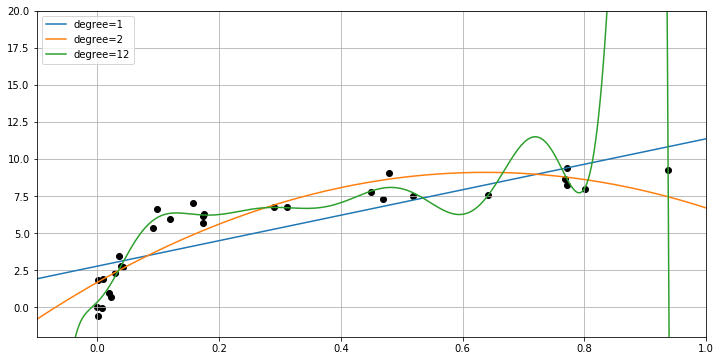

In [55]:
plt.figure(figsize=(12,6))
plt.grid()
plt.scatter(X.ravel(), y, color='black')

# Some test x values
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
# Fit different polynomials
for degree in [1,2,12]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 20)
plt.legend(loc='best');

## Choosing the Right Model

Sklearn provides a function (validation_curve) to choose the complexity of the model. It computes the negative of MSE for different complexities of the model.

In [58]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,15)
train_score,test_score = validation_curve(PolynomialRegression(),X,y,
                                          'polynomialfeatures__degree',
                                          degree,cv=5,
                                          scoring='neg_mean_squared_error')
print(train_score.shape,test_score.shape)

(15, 5) (15, 5)


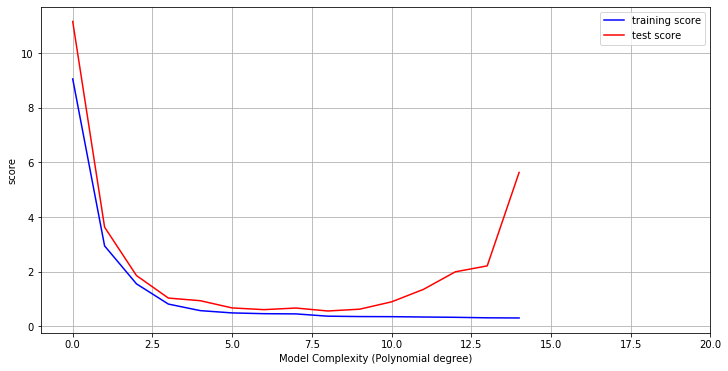

In [59]:
plt.figure(figsize=(12,6))
plt.plot(-np.median(train_score,axis=1),color='blue',label='training score')
plt.plot(-np.median(test_score,axis=1),color='red',label='test score')
plt.legend(loc='best')
plt.xlabel('Model Complexity (Polynomial degree)')
plt.ylabel('score')
plt.xlim(-1,20)
plt.grid()

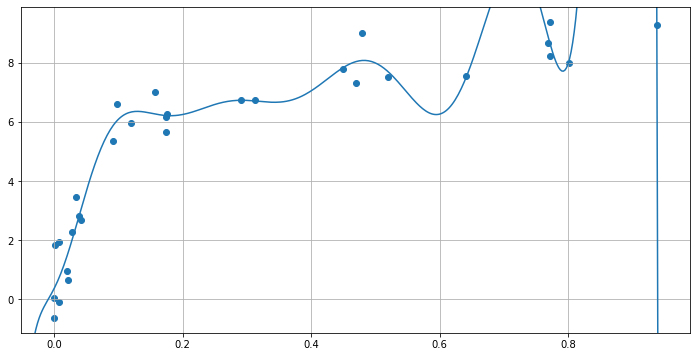

In [57]:
plt.figure(figsize=(12,6))
plt.scatter(X,y)
lim = plt.axis()
y_test = PolynomialRegression(12).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)
plt.grid()

## Model Complexity wrt Training Data Size

With increase in training data, model complexity can be increased. A comparison example follows.

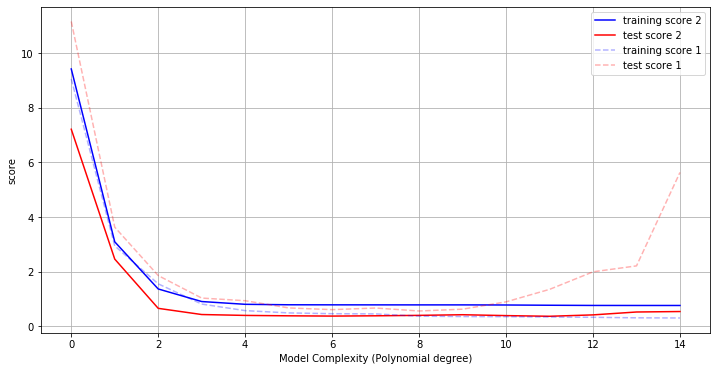

In [64]:
sample_size2 = 100
X2,y2 = make_data(N=sample_size2,err=1.0,rseed=1)
train_score2,test_score2 = validation_curve(PolynomialRegression(),X2,y2,
                                           "polynomialfeatures__degree",
                                           degree,cv=75,
                                            scoring="neg_mean_squared_error")
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(-np.median(train_score2,1),color='blue',label='training score 2')
plt.plot(-np.median(test_score2,1),color='red',label='test score 2')
plt.plot(-np.median(train_score,1),color='blue',label='training score 1',alpha=0.3,linestyle='dashed')
plt.plot(-np.median(test_score,1),color='red',label='test score 1',alpha=0.3,linestyle='dashed')
plt.xlabel('Model Complexity (Polynomial degree)')
plt.ylabel('score')
plt.legend(loc='best')

### Variation of Model Complexity with Training Data Size

Sklearn offers a function learning_curve to study the behaviour of the model for different training data sizes.

In [0]:
# Import learning_curve
from sklearn.model_selection import learning_curve

In [0]:
# Plotting function for a given training size
def plot_learning_curve(train_size,train_score,val_score):
    plt.plot(train_size,train_score,color='blue',label='training score')
    plt.plot(train_size,val_score,color='red',label='validation score')
    plt.hlines(np.mean([train_score[-1],val_score[-1]]),train_size[0],train_size[-1],
                        color='gray',linestyle='dashed')
    plt.ylim(0,1)
    plt.xlim(train_size[0],train_size[-1])
    plt.xlabel('training size')
    plt.ylabel('score')
    plt.legend(loc='best')
    plt.grid()

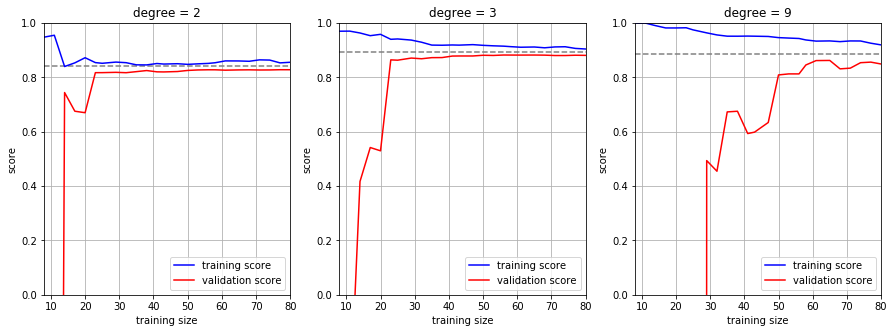

In [74]:
# Study of training size influence for different model complexities
degrees = [2,3,9]
X,y = make_data(100)

plt.figure(figsize=(15,5))
for i,deg in enumerate(degrees):
    train_size,train_score,val_score = learning_curve(PolynomialRegression(deg),
                                                      X,y,cv=5,
                                                      train_sizes=np.linspace(0.1,1,25))    
    plt.subplot(1,len(degrees),i+1)
    plt.title('degree = ' + str(deg))
    plot_learning_curve(train_size,np.mean(train_score,1),np.mean(val_score,1))